In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create datasets
buff = open('train-images-idx3-ubyte','rb')
magic_number = int.from_bytes(buff.read(4), byteorder='big')
N = int.from_bytes(buff.read(4), byteorder='big')
n_row = int.from_bytes(buff.read(4), byteorder='big')
n_col = int.from_bytes(buff.read(4), byteorder='big')
X = np.matrix(np.frombuffer(buff.read(), dtype='uint8').reshape(N,-1), dtype='float')/255

In [3]:
# Centering data
avg = X.mean(0)
print(avg.shape)
X = X - avg
eig_val, W = np.linalg.eig(X.T@X)
idx = [(-l.real, i) for i,l in enumerate(eig_val)]
idx.sort()
sorted_idx = [j for _,j in idx]
W = W[:,sorted_idx].real
eig_val = eig_val[sorted_idx].real

(1, 784)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


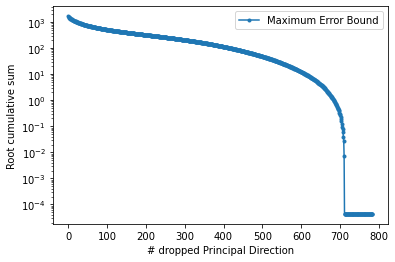

In [4]:
plt.semilogy(np.sqrt(eig_val.sum() - np.cumsum(eig_val)), marker='.', label='Maximum Error Bound')
plt.gca().legend()
plt.gca().set_xlabel('# dropped Principal Direction')
plt.gca().set_ylabel('Root cumulative sum')
plt.gcf().savefig('../slide/pic/mnist/eigenvalues.eps', transparent=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

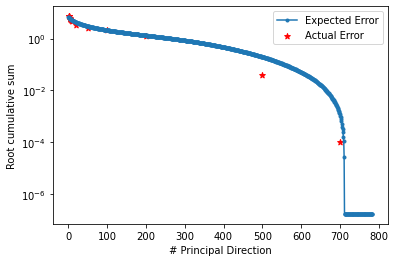

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
x1 = X[7].T
fancy_x = (np.array(x1).reshape(-1) + np.array(avg).reshape(-1)).reshape(n_row, n_col)
f1 = W.T@x1
## Error plots
fig_error, ax_error = plt.subplots(1)
ax_error.semilogy(np.sqrt((eig_val.sum() - np.cumsum(eig_val))/N), marker='.', label='Expected Error')
ax_error.set_xlabel('# Principal Direction')
ax_error.set_ylabel('Root cumulative sum')
for j, i in enumerate([1,2,3,4,5,6,7,8,9,10,20,50,100,200,500,700]):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(fancy_x, cmap='Greys', label='Original')
    ax[0].set_title('Original')
    ax[0].set_axis_off()
    tilde_x1 = W[:,:i]@f1[:i]
    fancy_tilde_x = (np.array(tilde_x1).reshape(-1) + np.array(avg).reshape(-1)).reshape(n_row, n_col)
    ax[1].imshow(fancy_tilde_x, cmap='Greys')
    ax[1].set_title(f'''{i:3d}-factors compression''')
    ax[1].set_axis_off()
    # Computing distance
    error = np.linalg.norm((fancy_x - fancy_tilde_x),'fro')
    rmse = np.linalg.norm((fancy_x - fancy_tilde_x),'fro')/np.sqrt(n_row*n_col)
    fig.suptitle(f'''Euclidean Distance : {error:.2e}
                       RMSE : {rmse:.2e}''', fontsize=14, x=0.5,y=0.20)
    fig.savefig(f"../slide/pic/mnist/compress-{i}.eps")
    fig.clf()
    # Error
    if j==0:
        ax_error.scatter(x=i, y=error, color='r', marker='*', label='Actual Error')
        ax_error.legend()
    else:
        ax_error.scatter(x=i, y=error, color='r', marker='*')
    fig_error.savefig(f'../slide/pic/mnist/cum_eig-{i}.eps', transparent=True)
    fig_error.show()


In [12]:
W[:,:1].shape

(784, 1)

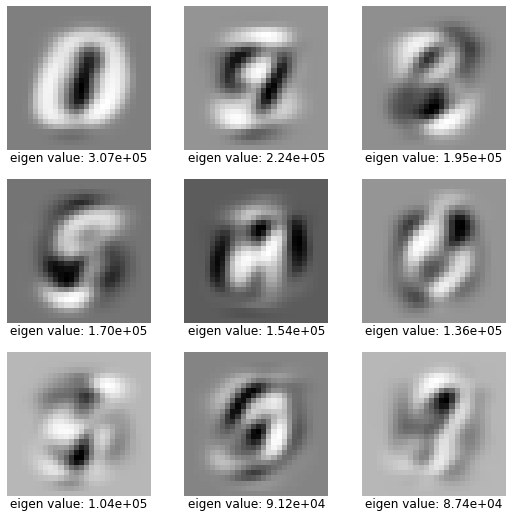

In [25]:
## First Eigenvectors
plt.close()
fig, axes = plt.subplots(3,3, figsize = (9,9))
for i, ax in enumerate(axes.ravel()):
    act = (W[:,i].reshape(-1)).reshape(n_row, n_col)
    ax.imshow(act, cmap='Greys')
    ax.set_title(f'eigen value: {eig_val[i]:.2e}', x=0.5, y=-0.12)
    ax.set_axis_off()
fig.savefig('../slide/pic/eigen_digits.eps', transparent=True)